# Проект: Статистический анализ данных

Вы аналитик популярного сервиса аренды самокатов GoFast. Вам передали данные о некоторых пользователях из нескольких городов, а также об их поездках. Необходимо провести исследование и анализ данных и проверить некоторые гипотезы, которые могут помочь бизнесу вырасти. Продакт-менеджеры сервиса хотят увеличить количество пользователей с подпиской. Для этого они будут проводить различные акции, но сначала нужно выяснить несколько важных моментов и решить выгодно ли увеличение таких пользователей.

Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:

- без подписки
    - абонентская плата отсутствует;
    - стоимость одной минуты поездки — 8 рублей;
    - стоимость старта (начала поездки) — 50 рублей;
- с подпиской Ultra
    - абонентская плата — 199 рублей в месяц;
    - стоимость одной минуты поездки — 6 рублей;
    - стоимость старта — бесплатно.


In [1]:
# Импорт нужных библиотек
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
from scipy.stats import binom

#### Шаг 1. Загрузка данных

##### Загрузка и общая информация о данных датафрейма user_go

In [2]:
#Читаем датафрейм users_go
users_go = pd.read_csv('/datasets/users_go.csv')

In [3]:
#смотрим первые 5 строк
users_go.head()

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


In [4]:
#смотрим общую информацию
users_go.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


In [5]:
#смотрим общие параметры данных
users_go.describe().round()

,user_id,age
count,1565.0,1565.0
mean,763.0,25.0
std,443.0,5.0
min,1.0,12.0
25%,378.0,22.0
50%,762.0,25.0
75%,1146.0,28.0
max,1534.0,43.0


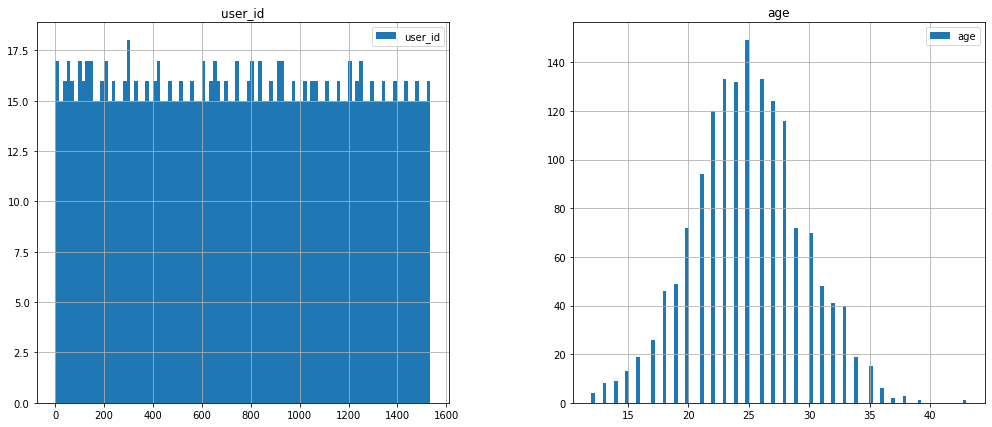

In [6]:
#строим общие гистограммы
users_go.hist(bins=100, grid=True, figsize=(17,7),legend=True);

##### Загрузка и общая информация о данных датафрейма rides_go

In [7]:
#Читаем датафрейм rides_go
rides_go = pd.read_csv('/datasets/rides_go.csv')

In [8]:
#смотрим первые 5 строк
rides_go.head().round()

,user_id,distance,duration,date
0,1,4410.0,26.0,2021-01-01
1,1,2618.0,16.0,2021-01-18
2,1,754.0,6.0,2021-04-20
3,1,2695.0,19.0,2021-08-11
4,1,4029.0,26.0,2021-08-28


In [9]:
#смотрим общую информацию
rides_go.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


In [10]:
#смотрим общие параметры данных
rides_go.describe().round()

,user_id,distance,duration
count,18068.0,18068.0,18068.0
mean,843.0,3071.0,18.0
std,435.0,1117.0,6.0
min,1.0,1.0,0.0
25%,487.0,2543.0,14.0
50%,889.0,3134.0,18.0
75%,1213.0,3776.0,22.0
max,1534.0,7211.0,41.0


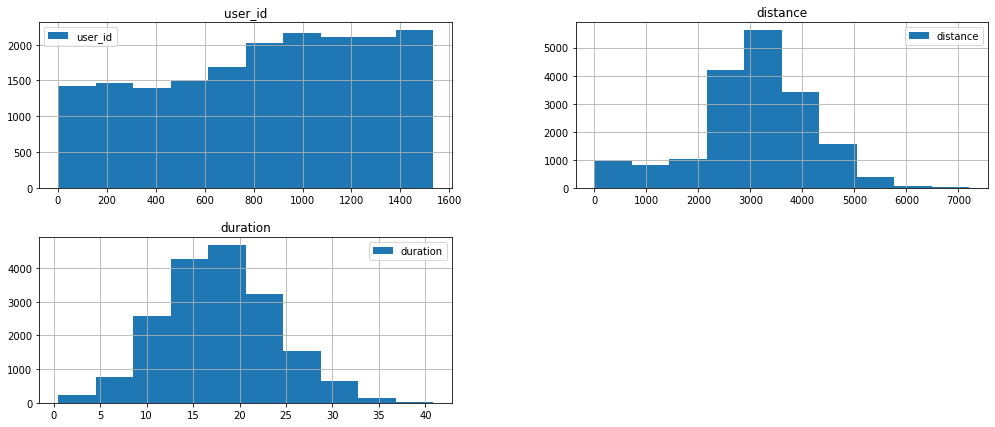

In [11]:
#строим общие гистограммы
rides_go.hist(bins=10, grid=True, figsize=(17,7),legend=True);

##### Загрузка и общая информация о данных датафрейма subscriptions_go 

In [12]:
#Читаем датафрейм subscriptions_go
subscriptions_go = pd.read_csv('/datasets/subscriptions_go.csv')

In [13]:
#смотрим первые 5 строк
subscriptions_go.head()

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [14]:
#смотрим общую информацию
subscriptions_go.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


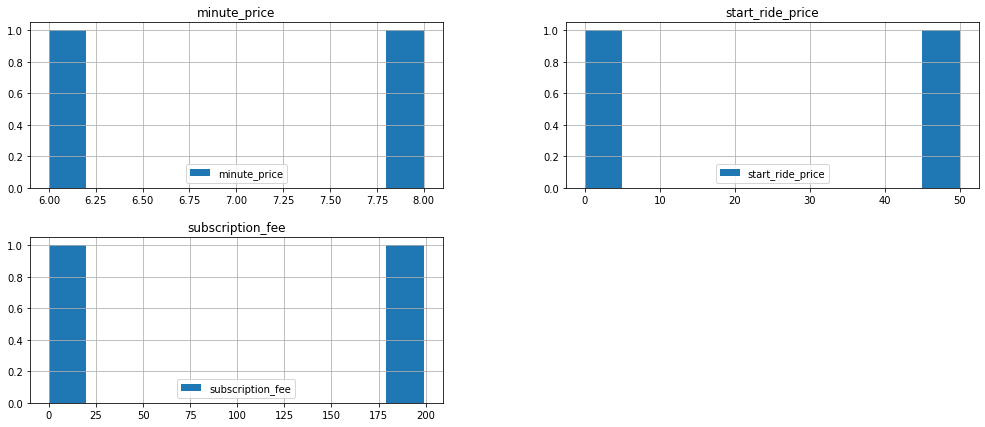

In [15]:
#строим общие гистограммы
subscriptions_go.hist(bins=10, grid=True, figsize=(17,7),legend=True);

<br> ***Вывод***

<br> Изучена общая информация о данных. На основе этого можно сказать следующее:
<br> В users_go 1565 записи. 25 лет - медианный возраст пользователя. Сервисом пользуются люди в возрасте от 12 до 43 лет.
<br> В users_go 18068 записи. 3137 м - медианное расстояние, 17,67 мин - медианная длительность поездок.
<br> В subscriptions_go 2 записи.
<br>Названия столбцов корректны. Для ряда столбцов в rides_goнекорректный тип данных.

#### Шаг 2. Предобработка данных

#####  Меняем тип данных

In [16]:
# Код ревьюера
rides_go.query('user_id == 1').head(8)

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28
5,1,2770.890808,16.650138,2021-10-09
6,1,3039.020292,14.927879,2021-10-19
7,1,2842.118050,23.117468,2021-11-06


In [18]:
#округлим значения до большего
rides_go['duration'] = np.ceil(rides_go['duration']) 
rides_go['distance'] = np.ceil(rides_go['distance']) 

In [19]:
# Код ревьюера
rides_go.query('user_id == 1').head(8)

,user_id,distance,duration,date
0,1,4410.0,26.0,2021-01-01
1,1,2618.0,16.0,2021-01-18
2,1,755.0,7.0,2021-04-20
3,1,2695.0,19.0,2021-08-11
4,1,4029.0,27.0,2021-08-28
5,1,2771.0,17.0,2021-10-09
6,1,3040.0,15.0,2021-10-19
7,1,2843.0,24.0,2021-11-06


In [20]:
#проверяем тип данных
rides_go.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


In [21]:
#меняем тип данных для даты
rides_go['date'] = pd.to_datetime(rides_go['date'], format='%Y-%m-%d %H:%M')
#rides_go.info()

##### Добавляем столбец с номером месяца на основе столбца `date`.

In [22]:
rides_go['month'] = rides_go['date'].dt.month
#rides_go

##### Проверяем данные на наличие дубликатов.

In [23]:
#смотрим количество дубликатов
print('Количество дубликатов users_go:', users_go.duplicated().sum())
print('Количество дубликатов rides_go:', rides_go.duplicated().sum())
print('Количество дубликатов  subscriptions_go:', subscriptions_go.duplicated().sum())

Количество дубликатов users_go: 31
Количество дубликатов rides_go: 0
Количество дубликатов  subscriptions_go: 0


In [59]:
def count_duplicates(df):
    return df.duplicated().sum()

In [61]:
print('Количество дубликатов users_go:', count_duplicates(users_go))
print('Количество дубликатов rides_go:', count_duplicates(rides_go))
print('Количество дубликатов  subscriptions_go:', count_duplicates(subscriptions_go))

Количество дубликатов users_go: 0
Количество дубликатов rides_go: 0
Количество дубликатов  subscriptions_go: 0


In [24]:
#удаляем явные дубликаты
users_go = users_go.drop_duplicates().reset_index(drop=True)

In [63]:
#проверяем дубликаты после удаления
print('Количество дубликатов users_go:', count_duplicates(users_go))

Количество дубликатов users_go: 0


##### Проверка данных на наличие пропущенных значений

In [64]:
def count_isna(df):
    return df.isna().sum()

In [65]:
#смотрим количество пропущенных значений
print('Количество пропущенных значений users_go: \n', count_isna(users_go), '\n')
print('Количество пропущенных значений rides_go: \n', count_isna(rides_go), '\n')
print('Количество пропущенных значений subscriptions_go: \n', count_isna(subscriptions_go), '\n')

Количество пропущенных значений users_go: 
 user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64 

Количество пропущенных значений rides_go: 
 user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64 

Количество пропущенных значений subscriptions_go: 
 subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64 



<br> ***Вывод***
<br> В данных users_go удалены явные дубликаты.
<br> В данных rides_go изменен тип данных столбца "date", добавлен новый столбец с номером мемяца. А так же изменен тип столбцов duration и distance.
<br> Данные в subscriptions_go не изменялись.
<br> Во всех данных пропущенные значения отсутствуют. 

#### Шаг 3. Исследовательский анализ данных

##### Частота встречаемости городов

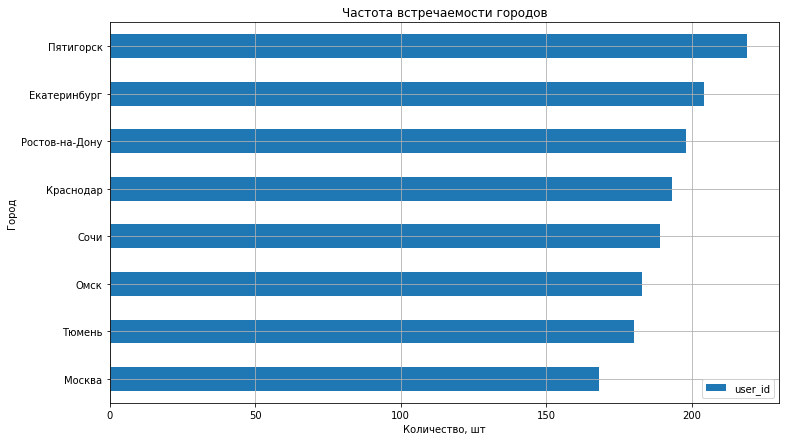

In [27]:
#частота встречаемости городов
users_go.pivot_table(index='city', values = 'user_id', aggfunc='count').sort_values(by = 'user_id', ascending=True).\
plot(kind='barh', grid=True, figsize=(12,7),legend=True)
plt.title('Частота встречаемости городов')
plt.xlabel('Количество, шт')
plt.ylabel('Город');

In [98]:
city_counts = users_go['city'].value_counts()
city_counts

Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: city, dtype: int64

##### Соотношение пользователей с подпиской и без подписки

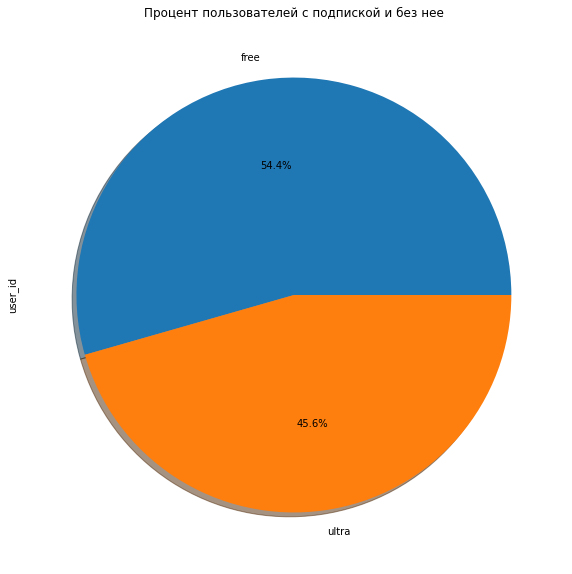

In [28]:
#соотношение пользователей с подпиской и без подписки
user_ratio = users_go.groupby('subscription_type', axis=0).count()
user_ratio['user_id'].plot(kind='pie', figsize=(10,10),
                  autopct='%1.1f%%',
                  shadow=True)
plt.title('Процент пользователей с подпиской и без нее')
plt.show();

In [29]:
#соотношение пользователей с подпиской и без подписки
user_ratio['user_id']

subscription_type
free     835
ultra    699
Name: user_id, dtype: int64

##### Возраст пользователей

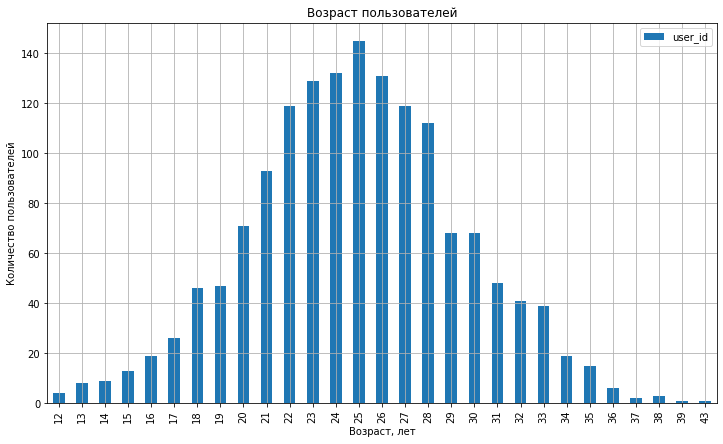

In [30]:
#возраст пользователей
users_go.pivot_table(index='age', values = 'user_id', aggfunc='count').\
plot(kind='bar', grid=True, figsize=(12,7),legend=True)
plt.title('Возраст пользователей')
plt.xlabel('Возраст, лет')
plt.ylabel('Количество пользователей');

In [31]:
# общая информация о возрасте пользователей
users_go['age'].describe().round()

count    1534.0
mean       25.0
std         5.0
min        12.0
25%        22.0
50%        25.0
75%        28.0
max        43.0
Name: age, dtype: float64

##### Количество поездок в зависимости от расстояния поездки

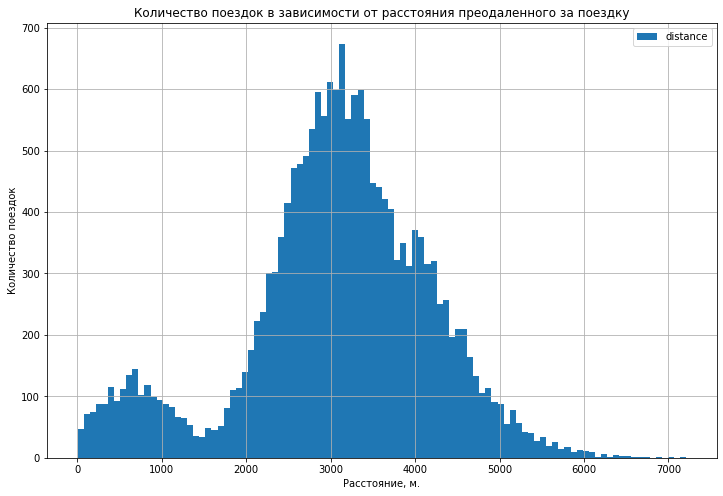

In [32]:
#расстояние, которое пользователь преодолел за одну поездку
plt.figure(figsize=(12,8))
plt.hist(rides_go['distance'], bins=100, label = ['distance'])
plt.grid(True)
plt.legend(loc='upper right')
plt.title('Количество поездок в зависимости от расстояния преодаленного за поездку')
plt.xlabel('Расстояние, м.')
plt.ylabel('Количество поездок')
plt.show();

In [33]:
# общая информация о расстоянии 
rides_go['distance'].describe().round()

count    18068.0
mean      3071.0
std       1117.0
min          1.0
25%       2544.0
50%       3134.0
75%       3777.0
max       7212.0
Name: distance, dtype: float64

##### Продолжительность поездок

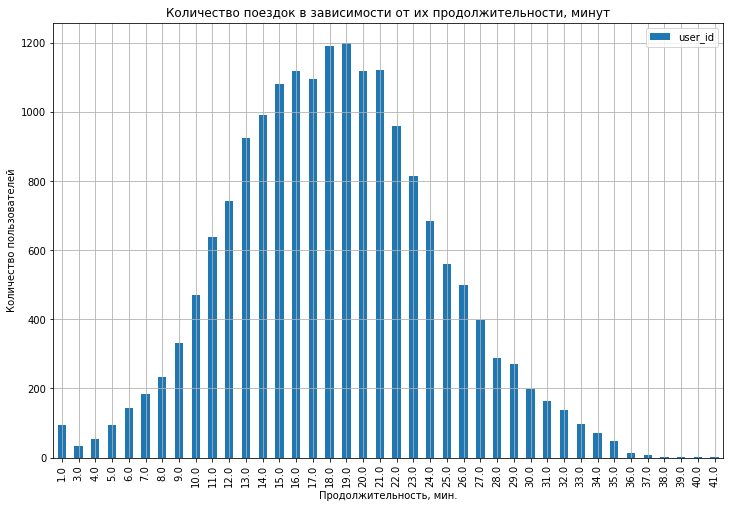

In [34]:
#продолжительность поездок
rides_go.pivot_table(index = 'duration', values='user_id', aggfunc='count').\
plot(kind='bar', grid=True, figsize=(12,8),legend=True)
plt.title('Количество поездок в зависимости от их продолжительности, минут')
plt.xlabel('Продолжительность, мин.')
plt.ylabel('Количество пользователей');

In [110]:
rides_go[rides_go['duration'] == 1].sort_values(by='distance', ascending = 'True')

,user_id,distance,duration,date,month
15132,1325,4031.0,1.0,2021-12-22,12
17909,1524,4104.0,1.0,2021-06-18,6
10692,1006,4107.0,1.0,2021-10-31,10
9698,937,4170.0,1.0,2021-12-12,12
14342,1268,4178.0,1.0,2021-06-09,6
...,...,...,...,...,...
14574,1285,6317.0,1.0,2021-09-25,9
13701,1224,6415.0,1.0,2021-07-15,7
11385,1057,6602.0,1.0,2021-02-07,2
17242,1477,6725.0,1.0,2021-01-12,1


Вывод: Наименьшее расстояние при поездках длительностью менее 1 минуты - 4031 м, эти поездки не могут быть короткими, скорее всего это сбой. Таких строк всего 95, поэтому они вряд ли вносят сильное влияние и, думаю, что их можно не исправлять. </div>

In [113]:
#общая информация о продолжительности поездок
rides_go['duration'].describe().round()

count    18068.0
mean        18.0
std          6.0
min          1.0
25%         14.0
50%         18.0
75%         22.0
max         41.0
Name: duration, dtype: float64

<br>***Вывод***
<br> Сервис аренды самокатов GoFast пользуется большей популярностью в южных городах, таких как 1 место - Пятигорск, 3 место - Ростов-на-Дону, 4 место - Краснодар, 5 место - Сочи. Екатеринбург находится на 2 месте. Наименьшей популярностью пользуется в городах Омск (6 место), Тюмень(7 место) и Москва (8 место). 
<br>Так как южных городов больше всего, то можно предположить, что этот сервис начал развиваться с Юга и успел обрести там бОльшую популярность.
<br>Подписку имеют всего около 46% пользователей (699), 54% пользователей (899 человек) не пользуются подпиской.
<br>График распределения возраста пользователй напоминает нормальное распределение, а медиана (25 лет) и среднее (24,9 лет) почти совпадают. 
<br>За одну поездку преодолевается расстояние от 1 до 7211 метров. Медиана составляет 3133 метров. Наблюдается пик в районе 3200 метров.
<br>Продолжительность поездок нормально распределена, их среднее(17.3 минуты) и медиана (17 минут) почти совпадают. Наблюдаются аномальные значения - около 100 поездок продолжительностью до минуты.


#### Шаг 4. Объединение данных

##### Объедините данные о пользователях, поездках и подписках в один датафрейм.

In [36]:
data = users_go.merge(rides_go, on='user_id').merge(subscriptions_go, on='subscription_type')
data.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4410.0,26.0,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2618.0,16.0,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,755.0,7.0,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2695.0,19.0,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4029.0,27.0,2021-08-28,8,6,0,199


In [115]:
#проверка на пропуски
print('Количество пропущенных значений data: \n', count_isna(data), '\n')

Количество пропущенных значений data: 
 user_id              0
name                 0
age                  0
city                 0
subscription_type    0
distance             0
duration             0
date                 0
month                0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64 



##### Создайте датафрейм c данными о пользователях без подписки.

In [37]:
data_free = data[data['subscription_type']=='free']
data_free.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2516.0,15.0,2021-01-02,1,8,50,0
6501,700,Айдар,22,Омск,free,847.0,17.0,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,free,4005.0,21.0,2021-02-04,2,8,50,0
6503,700,Айдар,22,Омск,free,1206.0,10.0,2021-02-10,2,8,50,0
6504,700,Айдар,22,Омск,free,3048.0,18.0,2021-02-14,2,8,50,0


##### Создайте датафрейм c данными о пользователях с подпиской.

In [38]:
data_ultra = data[data['subscription_type']=='ultra']
data_ultra.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4410.0,26.0,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2618.0,16.0,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,755.0,7.0,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2695.0,19.0,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4029.0,27.0,2021-08-28,8,6,0,199


##### Визуализируйте информацию о расстоянии и времени поездок для пользователей обеих категорий.

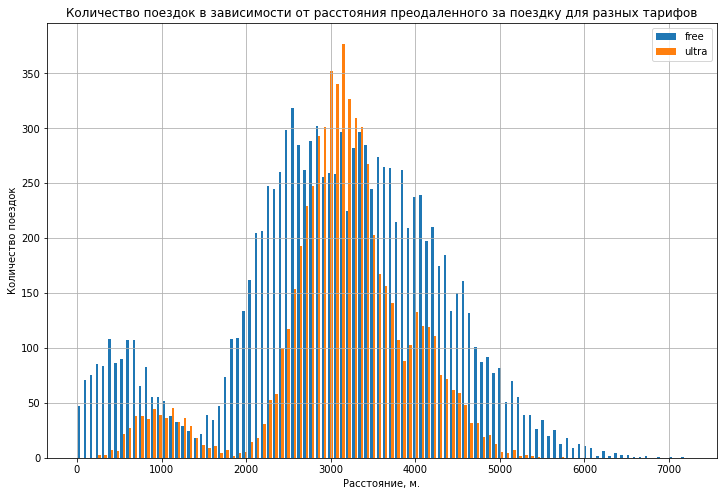

In [39]:
#расстояние, которое пользователь преодолел за одну поездку
plt.figure(figsize=(12,8))
plt.hist([data_free['distance'],data_ultra['distance']], bins=100, label=['free', 'ultra'])
plt.grid(True)
plt.legend(loc='upper right')
plt.title('Количество поездок в зависимости от расстояния преодаленного за поездку для разных тарифов')
plt.xlabel('Расстояние, м.')
plt.ylabel('Количество поездок')
plt.show();

In [40]:
#общая информация о преодаленном расстоянии без подписки
data_free['distance'].describe().round()

count    11568.0
mean      3046.0
std       1246.0
min          1.0
25%       2367.0
50%       3115.0
75%       3906.0
max       7212.0
Name: distance, dtype: float64

In [41]:
#общая информация о преодаленном расстоянии с подпиской ультра
data_ultra['distance'].describe().round()

count    6500.0
mean     3116.0
std       837.0
min       245.0
25%      2786.0
50%      3149.0
75%      3561.0
max      5700.0
Name: distance, dtype: float64

In [123]:
data_ultra_median = data_ultra['distance'].median()

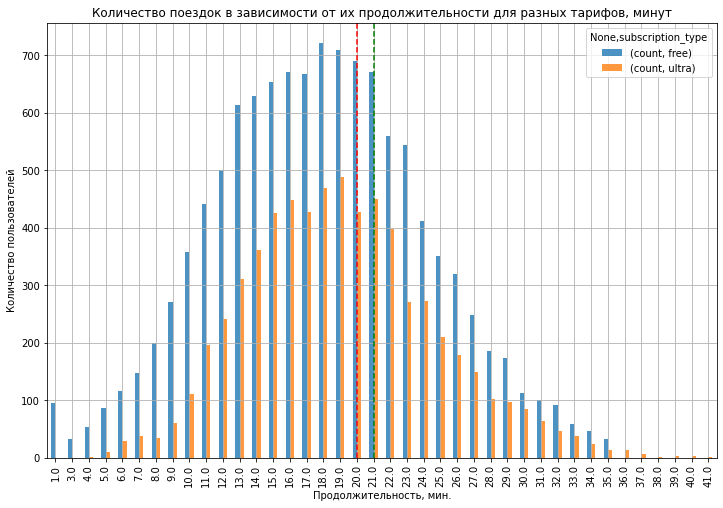

In [152]:
#медиана времени
median_free = data[data['subscription_type'] == 'free']['duration'].median()
median_ultra = data[data['subscription_type'] == 'ultra']['duration'].median()

data.pivot_table(index=['duration'], columns = 'subscription_type', values='user_id', aggfunc=['count']) \
.plot(kind='bar', grid=True, linewidth=3, alpha=0.8, figsize=(12,8),\
title= 'Количество поездок в зависимости от их продолжительности для разных тарифов, минут')
# добавляем медиану на график
plt.axvline(x=median_free, color='r', linestyle='--')
plt.axvline(x=median_ultra, color='g', linestyle='--')

plt.xlabel('Продолжительность, мин.')
plt.ylabel('Количество пользователей')
plt.show();

In [43]:
#время, потраченное без подписки
data_free['duration'].describe().round()

count    11568.0
mean        18.0
std          6.0
min          1.0
25%         13.0
50%         18.0
75%         22.0
max         35.0
Name: duration, dtype: float64

In [44]:
#время, потраченное с подпиской ультра
data_ultra['duration'].describe().round()

count    6500.0
mean       19.0
std         6.0
min         4.0
25%        15.0
50%        19.0
75%        22.0
max        41.0
Name: duration, dtype: float64

<br>***Вывод***
<br> По полученному графику **"Количество поездок в зависимости от расстояния преодаленного за поездку для разных тарифов"** можно сказать, что распределение пользователей без подписки более широкое, то есть они чаще совершают и короткие и длинные поездки, так же и количество таких пользователе больше почти в 2 раза. И стандартное отклонение 1246 м против 837 м у тех, кто пользуется подпиской:
- как раз у пользователей без подписки мы наблюдаем аномальные значения - около 50 поездок меньше 1 метра, а вот у пользователей с подпиской минимальная поездка начинается только с 244 метров. 
- максимальное расстояние для пользователей без подписки больше и составляет 7211 м, а у пользователей с подпиской - 5699 м.
- медианное расстояние у пользователей без подписки меньше - 3114 м против 3148 м у тех, кто пользуется подпиской.

<br>По полученному графику **"Количество поездок в зависимости от их продолжительности для разных тарифов, минут"** можно сказать, что: продолжительность поездок у пользователей без подписки меньше, чем у пользователей с подпиской:
- минимальная продолжительность у пользователей без подписки - 0 мин, а у пользователей с подпиской 3 минуты.
- максимальная продолжительность у пользователей без подписки меньше - 34 мин, а у пользователей с подпиской 40 минут.
- медианное значение у пользователей без подписки меньше - 17 минут против 18минут у тех, кто пользуется подпиской.
- у пользователей без подписки есть аномальные значения - около 100 поездок с продолжительностью меньше 1 минуты (возможно отказались из-за тарифа);


#### Шаг 5. Подсчёт выручки

#####  Найдите суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.

In [153]:
user_argument = data.pivot_table(index = ('user_id', 'month'),\
values = ('distance','duration', 'minute_price', 'start_ride_price', 'subscription_fee'),\
aggfunc = ({'distance':{'count', 'sum'}, 'duration' : 'sum', 'minute_price' : 'mean', 'start_ride_price': 'mean',\
'subscription_fee' : 'mean'}))
user_argument.columns = ['count', 'distance', 'duration', 'minute_price', 'start_ride_price', 'subscription_fee']
user_argument.head(10)

count  distance  duration  minute_price  start_ride_price  \
user_id month                                                              
1       1          2    7028.0      42.0             6                 0   
        4          1     755.0       7.0             6                 0   
        8          2    6724.0      46.0             6                 0   
        10         2    5811.0      32.0             6                 0   
        11         3    7005.0      56.0             6                 0   
        12         2    6753.0      28.0             6                 0   
2       3          3   10190.0      63.0             6                 0   
        4          2    6165.0      40.0             6                 0   
        6          1    3256.0      14.0             6                 0   
        7          2    6781.0      48.0             6                 0   

               subscription_fee  
user_id month                    
1       1                   199  
        4                   199  
        8                   199  
        10                  199  
        11                  199  
        12                  199  
2       3                   199  
        4                   199  
        6                   199  
        7                   199

##### В этот же датафрейм добавьте столбец с помесячной выручкой, которую принёс каждый пользователь.

In [154]:
user_argument['income'] = user_argument['duration'] * user_argument['minute_price'] + user_argument['start_ride_price'] * \
user_argument['count'] + user_argument['subscription_fee']
user_argument.head(10)

count  distance  duration  minute_price  start_ride_price  \
user_id month                                                              
1       1          2    7028.0      42.0             6                 0   
        4          1     755.0       7.0             6                 0   
        8          2    6724.0      46.0             6                 0   
        10         2    5811.0      32.0             6                 0   
        11         3    7005.0      56.0             6                 0   
        12         2    6753.0      28.0             6                 0   
2       3          3   10190.0      63.0             6                 0   
        4          2    6165.0      40.0             6                 0   
        6          1    3256.0      14.0             6                 0   
        7          2    6781.0      48.0             6                 0   

               subscription_fee  income  
user_id month                            
1       1                   199   451.0  
        4                   199   241.0  
        8                   199   475.0  
        10                  199   391.0  
        11                  199   535.0  
        12                  199   367.0  
2       3                   199   577.0  
        4                   199   439.0  
        6                   199   283.0  
        7                   199   487.0

In [155]:
user_argument['income'].describe()

count    11331.000000
mean       342.303504
std        153.875346
min         58.000000
25%        234.000000
50%        319.000000
75%        415.000000
max       1444.000000
Name: income, dtype: float64

In [156]:
user_argument['income'].sum()#общая выручка сервиса

3878641.0

<br>***Вывод***
<br> Добавлен столбец с помесячной выручкой, в среднем пользователь тратит в месяц 330 рублей, общая выручка сервиса: 3 878 641 руб. 

#### Шаг 6. Проверка гипотез

#####  Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. 

<br>Проверяем гипотезу: пользователи с подпиской тратят больше времени на поездки, чем пользователи без неё.
<br>Запишем нулевую и альтернативную гипотезы.

<br>H0: Время пользователей на подписке ultra равно времени пользователей на подписке free
<br>H1: Время пользователей на подписке ultra больше времени пользователей на подписке free

<br>Уровень статистической значимости: alpha = 0.05
<br>В качестве alternative указываем 'greater', то есть «больше».

In [50]:
ultra = data_ultra['duration']
free = data_free['duration']

alpha = 0.05 

results = st.ttest_ind(
    ultra, 
    free,
    alternative='greater')

print('p-значение:', results.pvalue)


if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 2.4959453720736625e-34
Отвергаем нулевую гипотезу


Нулевая гипотеза отвергается, есть основания пологать, что средняя продолжительность поездки с подпиской больше продолжительности поездок без подписки.

##### Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? 

<br>Проверяем гипотезу: среднее расстояние одной поездки пользователей с подпиской не превышает 3130 м.
<br>Запишем нулевую и альтернативную гипотезы.

<br>H0: Среднее расстояние одной поездки пользователей на подписке ultra равно оптимальному расстоянию 3130 м.
<br>H1: Среднее расстояние одной поездки пользователей на подписке ultra больше оптимального расстояния 3130 м.

<br>Уровень статистической значимости: alpha = 0.05
<br>В качестве alternative указываем 'greater', то есть «больше».

In [51]:
ultra_distance = data_ultra['distance']
optimal_distance = 3130

alpha = 0.05 

results = st.ttest_1samp(
    ultra_distance, 
    optimal_distance,
    alternative='greater')

print('p-значение:', results.pvalue)


if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.9120422337080507
Не получилось отвергнуть нулевую гипотезу


Не получилось отвергнуть нулевую гипотезу, среднее расстояние одной поездки пользователей на подписке ultra не превышает оптимального расстояния 3130 м

##### Проверьте гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. 

<br>Проверяем гипотезу: помесячная выручка от пользователей с подпиской выше, чем от пользователей без подписки.
<br>Запишем нулевую и альтернативную гипотезы.

<br>H0: Помесячная выручка от пользователей с подпиской равна выручке от пользователей без подписки.
<br>H1: Помесячная выручка от пользователей с подпиской выше выручки от пользователей без подписки.

<br>Уровень статистической значимости: alpha = 0.05
<br>В качестве alternative указываем 'greater', то есть «больше».

In [52]:
income_month_ultra = user_argument.loc[user_argument['subscription_fee'] > 0, 'income']
income_month_free = user_argument.loc[user_argument['subscription_fee'] == 0, 'income']

alpha = 0.05 

results = st.ttest_ind(
    income_month_ultra, 
    income_month_free,
    alternative='greater')

print('p-значение:', results.pvalue)


if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 1.8850394384715216e-31
Отвергаем нулевую гипотезу


Нулевая гипотеза отвергнута, значит можно утверждать, что помесячная выручка от пользователей с подпиской выше выручки от пользователей без подписки.

##### Необходимо проверить снизилось ли количество обращений в техподдержку после обновления серверов.

Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

<br>Проверяем гипотезу: количество обращений в техподдержку изменилось.
<br>В этом случае нужно проверить, равны ли средние совокупности до и после этого изменения.
<br>Запишем нулевую и альтернативную гипотезы.

<br>H0: Количество обращений до обновлений равно количеству обращений после обновления.
<br>H1: Количество обращений до обновлений не равно количеству обращений после обновления.

<br> В этом случае необходимо применить метод scipy.stats.ttest_rel().

<br> Представим, что данные о количестве обращений до обновления хранятся в переменной before, а после обновления в after.

<br> Уровень статистической значимости: alpha = 0.05

<br>***Вывод***
<br> При проверке гипотезы: пользователи с подпиской тратят больше времени на поездки, чем пользователи без неё.Нулевая гипотеза отвергается, есть основания пологать, что средняя продолжительность поездки с подпиской выше продолжительности поездок без подписки.
<br> Проверка гипотезы: среднее расстояние одной поездки пользователей с подпиской не превышает 3130 м. Не получилось отвергнуть нулевую гипотезу, среднее расстояние одной поездки пользователей на подписке ultra не превышает оптимального расстояния 3130 м.
<br> Проверка гипотезы:помесячная выручка от пользователей с подпиской выше, чем от пользователей без подписки. Нулевая гипотеза отвергнута, значит можно утверждать, что средняя помесячная выручка от пользователей с подпиской выше средней помесячной выручки от пользователей без подписки.
<br> Для сравнения парных выборок при условии, что произошло какое-либо изменение, в нашем случае количество обращений до и после обновления серверов, необходимо использовать метод scipy.stats.ttest_rel().

<br>***Общий вывод***
<br> 1. В ходе выполнения работы было загружено и получено общее представление о трёх датафреймах: пользователи, поездки, подписки.
<br> 2. Данные были проверены на пропуски и дубликаты. Пропусков в данных не оказалось, в датафрейме users_go удалены явные дубликаты.
<br> 3. Выполнено изменение типа данных для столбцов 'duration', 'distance', 'date'.
<br> 4. В ходе исследовательского анализа выявлено, что данный сервис самокатов чаще всего присутствует в Южных городах, на первом месте по количеству пользователей - Пятигорск. На последнем месте - Москва. 
<br> 5. Пользователей с бесплатной подпиской больше: около 54%, а с платной подпиской меньше - 46%. 
<br> 6. Возраст пользователей сервиса варьируется от 12 до 43 лет, а медианный - 25 лет.
<br> 7. Основная масса пользователей в среднем за поездку проезжает расстояние от 2,5 км до 3,7 км. А длительность поездок большинства пользователей составляет от 13 до 21 минуты. 
<br> 8. Выполнено объединение всех датафреймов в один - data. А так же на основе этого датафрейма добавлено еще 2: с подпиской ultra и free.
<br> 9. По полученному графику "Количество поездок в зависимости от расстояния преодаленного за поездку для разных тарифов" можно сказать, что распределение пользователей без подписки более широкое, то есть они чаще совершают и короткие и длинные поездки, так же и количество таких пользователе больше почти в 2 раза. И стандартное отклонение 1246 м против 837 м у тех, кто пользуется подпиской.
<br>10. По полученному графику "Количество поездок в зависимости от их продолжительности для разных тарифов, минут" можно сказать, что: продолжительность поездок у пользователей без подписки меньше, чем у пользователей с подпиской.
<br> 11. Выполнен помесячный подсчет выручки для каждого пользователя, в результате чего выяснено, что в среднем пользователь тратит в месяц 330 рублей, а общая выручка сервиса: 3 747 097 руб.
<br> 12. В результате проверки гипотез выяснено, что пользователи с подпиской более выгодны для компании и нужно увеличивать число таких пользователей.
<br> - Есть основания пологать, что средняя продолжительность поездки с подпиской выше продолжительности поездок без подписки.
<br> - Среднее расстояние одной поездки пользователей на подписке ultra не превышает оптимального, с точки зрения износа самоката, расстояния 3130 м.
<br> - Можно утверждать, что средняя помесячная выручка от пользователей с подпиской выше средней помесячной выручки от пользователей без подписки.